In [38]:
from ultralytics import YOLO
import pandas as pd
import cv2
import matplotlib.pyplot as plt
model = YOLO(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/src/Object Detection/runs/detect/train2/weights/best.pt"
)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [37]:
classes = {
    0: "100",
    1: "among",
    2: "angry",
    3: "ankh",
    4: "aroura",
    5: "at",
    6: "bad_thinking",
    7: "bandage",
    8: "bee",
    9: "belongs",
    10: "birth",
    11: "board_game",
    12: "book",
    13: "boy",
    14: "branch",
    15: "bread",
    16: "brewer",
    17: "builder",
    18: "bury",
    19: "canal",
    20: "cloth_on_pole",
    21: "cobra",
    22: "composite_bow",
    23: "cooked",
    24: "corpse",
    25: "dessert",
    26: "divide",
    27: "duck",
    28: "elephant",
    29: "enclosed_mound",
    30: "eye",
    31: "fabric",
    32: "face",
    33: "falcon",
    34: "fingre",
    35: "fish",
    36: "flail",
    37: "folded_cloth",
    38: "foot",
    39: "galena",
    40: "giraffe",
    41: "he",
    42: "her",
    43: "hit",
    44: "horn",
    45: "king",
    46: "leg",
    47: "length_of_a_human_arm",
    48: "life_spirit",
    49: "limit",
    50: "lion",
    51: "lizard",
    52: "loaf",
    53: "loaf_of_bread",
    54: "man",
    55: "mascot",
    56: "meet",
    57: "mother",
    58: "mouth",
    59: "musical_instrument",
    60: "nile_fish",
    61: "not",
    62: "now",
    63: "nurse",
    64: "nursing",
    65: "occur",
    66: "one",
    67: "owl",
    68: "pair",
    69: "papyrus_scroll",
    70: "pool",
    71: "quailchick",
    72: "reed",
    73: "ring",
    74: "rope",
    75: "ruler",
    76: "sail",
    77: "sandal",
    78: "semen",
    79: "small_ring",
    80: "snake",
    81: "soldier",
    82: "star",
    83: "stick",
    84: "swallow",
    85: "this",
    86: "to_be_dead",
    87: "to_protect",
    88: "to_say",
    89: "turtle",
    90: "viper",
    91: "wall",
    92: "water",
    93: "woman",
    94: "you",
}

reversed_classes = {v: k for k, v in classes.items()}
test_data = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/_annotations.csv"
)
test_data

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pair-13-_jpg.rf.00b5fe51fba9b40ddf2bf212cfa638...,640,640,Pair,279,252,413,361
1,papyrus-scroll-7-_jpg.rf.057bc680e540fcf9c8823...,640,640,Papyrus_Scroll,185,349,317,437
2,belongs-1-_jpg.rf.02044dee3ffba707db0388af036f...,640,640,Belongs,138,167,278,298
3,one-27-_jpg.rf.0c1b097a5ad422d790d896597e55dac...,640,640,One,401,341,451,408
4,hit-13-_jpg.rf.0919df39b6c2334496ec5ed6ed766f4...,640,640,Hit,238,115,382,337
...,...,...,...,...,...,...,...,...
384,galena-26-_jpg.rf.fcc57538723f2066cfbd7fd575fd...,640,640,Galena,280,152,391,294
385,he-14-_jpg.rf.fb84cd72fa58aa6f22e10f4da42bce21...,640,640,He,111,161,238,351
386,nurse-22-_jpg.rf.ecfc6e038c9ef509efb115d0f7ccc...,640,640,Nurse,285,249,402,380
387,leg-7-_jpg.rf.fdbf2457613b7587bc5e47da2c41611b...,640,640,Leg,382,166,554,295



image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/pair-13-_jpg.rf.00b5fe51fba9b40ddf2bf212cfa63892.jpg: 640x640 1 pair, 3.2ms
Speed: 1.0ms preprocess, 3.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


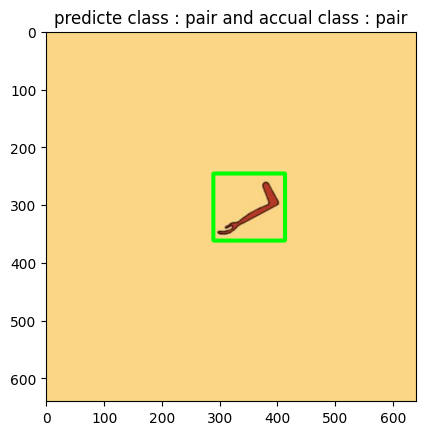


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/papyrus-scroll-7-_jpg.rf.057bc680e540fcf9c8823be4b7d3b6ae.jpg: 640x640 1 papyrus_scroll, 3.4ms
Speed: 0.9ms preprocess, 3.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


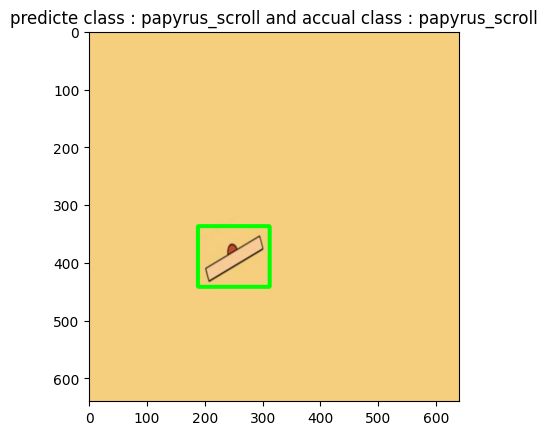


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/belongs-1-_jpg.rf.02044dee3ffba707db0388af036f440b.jpg: 640x640 1 belongs, 2.9ms
Speed: 0.9ms preprocess, 2.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


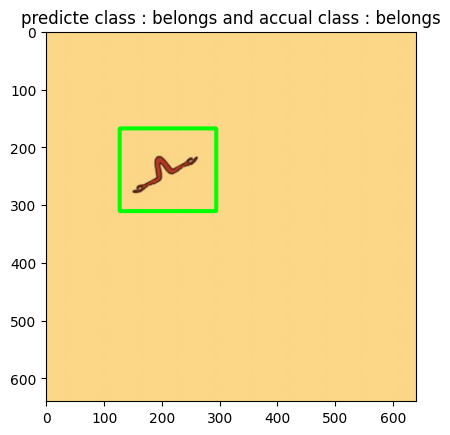


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/one-27-_jpg.rf.0c1b097a5ad422d790d896597e55dace.jpg: 640x640 1 one, 2.9ms
Speed: 0.9ms preprocess, 2.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


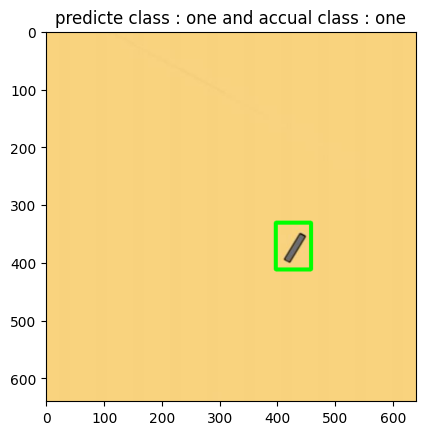


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/hit-13-_jpg.rf.0919df39b6c2334496ec5ed6ed766f41.jpg: 640x640 1 hit, 2.8ms
Speed: 0.9ms preprocess, 2.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


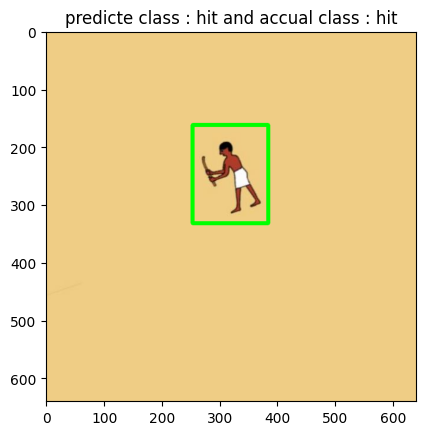


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/leg-18-_jpg.rf.0b67ed0173b5d17f00aa3b1008f1c5d0.jpg: 640x640 1 foot, 1 leg, 3.0ms
Speed: 0.9ms preprocess, 3.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


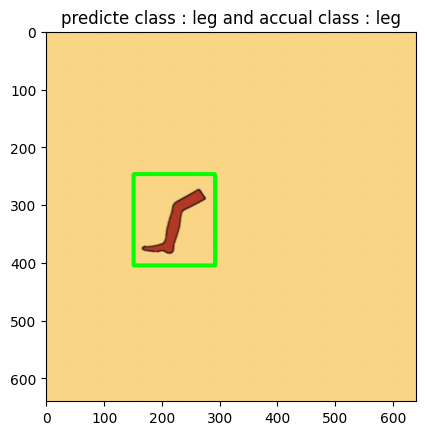


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/brewer-14-_jpg.rf.0b86f89f83eeff8355e499b709fb4e62.jpg: 640x640 1 brewer, 2.9ms
Speed: 0.9ms preprocess, 2.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


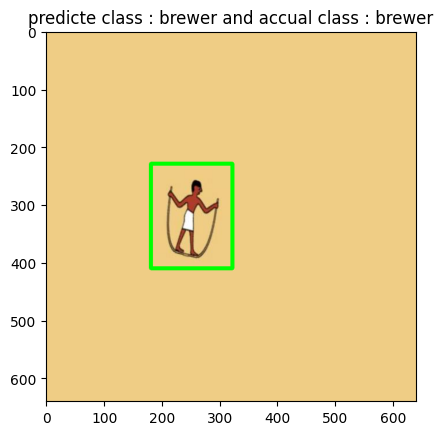


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/100-16-_jpg.rf.01245963521559fa2e7c874464d6bfa8.jpg: 640x640 1 100, 2.9ms
Speed: 1.0ms preprocess, 2.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


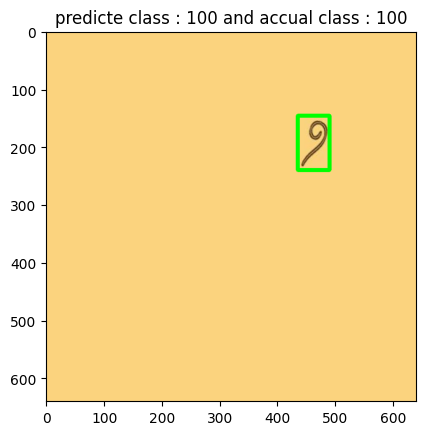


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/corpse-3-_jpg.rf.0831ae66040e88ce334eb95740c6d0a5.jpg: 640x640 1 corpse, 3.5ms
Speed: 0.9ms preprocess, 3.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


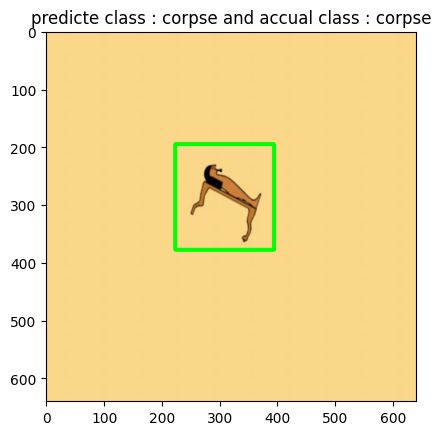


image 1/1 /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/life-spirit-30-_jpg.rf.0bbd6d14cd59675587316ac006434dc5.jpg: 640x640 1 life_spirit, 2.9ms
Speed: 0.9ms preprocess, 2.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


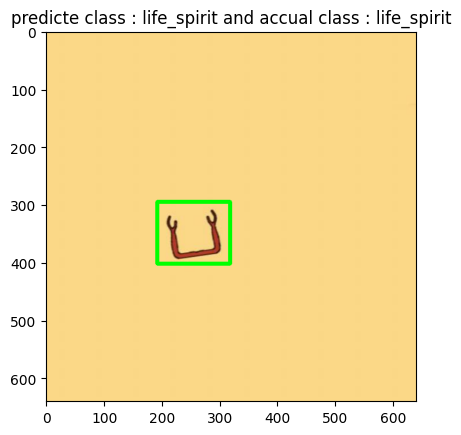

In [46]:
path = "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/"
for instance in range (10):
    img = path + test_data.iloc[instance]["filename"]
    accual_class = test_data.iloc[instance]["class"].lower()
    results = model(img)
    
    extracted_data = results[0].boxes

    clss = int(extracted_data.cls[0])
    
    box = extracted_data.xyxy
    
    x1 = int(box[0][0])
    y1 = int(box[0][1])
    x2 = int(box[0][2])
    y2 = int(box[0][3])    
    
    predicte_class = classes[clss]
    
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    plt.imshow(img)
    plt.title(f"predicte class : {predicte_class} and accual class : {accual_class}")
    plt.show()
    